## **Ensemble learning**



 A machine learning technique that combines predictions from multiple models to improve accuracy.


 Aims to mitigate errors or biases that may exist in individual models.


 Utilizes the strengths of different models to create a more precise prediction.





**Simple Ensemble Techniques:**


 **Max Voting:** The predictions by each model are considered as a 'vote'. The predictions which we get the majority of the models agree on are used as the final prediction.





In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generating some sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

# Max Voting classifier
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')

# Training model
model.fit(X_train, y_train)

# Predicting test results
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Max Voting Accuracy:", accuracy)


Max Voting Accuracy: 0.855



 **Averaging**: Averaging aggregates predictions by taking the average probability (for classification) or the mean prediction (for regression) across multiple models.


 [We Use probability=True, is used to enable the prediction of probabilities for classes in models that support it, providing more information for soft voting]






In [2]:
from sklearn.ensemble import VotingClassifier

# Averaging classifier
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')

# Train model
model.fit(X_train, y_train)

# Predicting test result
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Averaging Accuracy:", accuracy)


Averaging Accuracy: 0.86


 **Weighted Averaging**: All models are assigned different weights defining the importance of each model for prediction.



In [3]:
# Define weights for models
weights = [0.3, 0.4, 0.3]

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft', weights=weights)

# Training model
model.fit(X_train, y_train)

# Predicting test results
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Weighted Averaging Accuracy:", accuracy)

Weighted Averaging Accuracy: 0.875


**Advanced Ensemble Techniques:**


 **Stacking**: A new model is built on the predictions of other models.


 **Blending**: A new model is built on the predictions of other models and the actual values of the training set.

**Algorithms based on Bagging and Boosting:**

 **Bagging**: Multiple subsets are created from the original dataset, selecting observations with replacement. A base model is created on each of these subsets.

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.89

In [5]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6038589086523967

 **Boosting**: A sequential process, where each subsequent model attempts to correct the errors of the previous model.

**AdaBoost:**


 **AdaBoost** (Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak learners to create a strong learner.


 It is an iterative algorithm that sequentially builds weak learners, where each weak learner focuses on the hardest examples from the previous round.


 AdaBoost is known for its ability to handle noisy data and its robustness to overfitting.





In [6]:
# Sample code for classification
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)



0.875

**Sample code for regression problem:**

In [7]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4001137738146118

**Gradient Boosting Machines (GBM)**:



 **Gradient Boosting Machines (GBM)** is an ensemble learning algorithm that builds a sequence of weak learners, where each weak learner is trained to minimize the gradient of the loss function with respect to the predictions of the previous weak learner.


 GBM is a powerful algorithm that can achieve high accuracy on a variety of tasks.


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.89

In [9]:
# Sample code for Regressor
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6128710271433714

**XGBoost:**


 **XGBoost** is an optimized version of GBM that includes several improvements, such as:

1.   Parallel Processing: XGBoost implements parallel processing and is faster than GBM .
2.   Regularization techniques: XGBoost uses regularization techniques to prevent overfitting, which is a common problem in machine learning.

[*Since XGBoost takes care of the missing values itself, you do not have to impute the missing values. ]

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [11]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.88

In [12]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6251452430469582

**LightGBM:**


 **LightGBM** is another optimized version of GBM that is known for its speed and efficiency.


 It uses a novel tree-growing algorithm that is specifically designed for boosting algorithms.


 **LightGBM** also includes several other optimizations that make it faster than XGBoost, such as:



1.   Parallel processing: LightGBM can be trained on multiple CPUs or GPUs, which can significantly reduce training time.
2.   Histogram-based tree learning: LightGBM uses a histogram-based tree learning algorithm that is faster than traditional tree learning algorithms.











In [13]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [14]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)


print("LightGBM Accuracy:", accuracy)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Accuracy:", accuracy)


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.875
LightGBM Accuracy: 0.895


## Diabetes Data  using Ensemble Techniques

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [16]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape

(768, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
         categorical_val.append(column)
    else:
        continous_val.append(column)


In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
feature_columns = [
'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]
for column in feature_columns:
    print(f"column, {column} ==> Missing zeros : {len(df.loc[df[column] ==0])}")


column, Pregnancies ==> Missing zeros : 111
column, Glucose ==> Missing zeros : 5
column, BloodPressure ==> Missing zeros : 35
column, SkinThickness ==> Missing zeros : 227
column, Insulin ==> Missing zeros : 374
column, BMI ==> Missing zeros : 11
column, DiabetesPedigreeFunction ==> Missing zeros : 0
column, Age ==> Missing zeros : 0


In [24]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])
for column in feature_columns:
    print(f"column,{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")


column,Pregnancies ==> Missing zeros : 0
column,Glucose ==> Missing zeros : 0
column,BloodPressure ==> Missing zeros : 0
column,SkinThickness ==> Missing zeros : 0
column,Insulin ==> Missing zeros : 0
column,BMI ==> Missing zeros : 0
column,DiabetesPedigreeFunction ==> Missing zeros : 0
column,Age ==> Missing zeros : 0


In [25]:
X = df[feature_columns]
y = df.Outcome


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


## Bagging Algorithm

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Create a BaggingClassifier
base_classifier = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10,random_state=42)
# Fit the BaggingClassifier
bagging_clf.fit(X_train, y_train)
# Calculate and store accuracy scores for Bagging Classifier
bagging_scores = {
'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}
# Calculate and store accuracy scores for Bagging Classifier
scores = {
'Bagging Classifier': {
'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
},
}
# Calculate and store accuracy scores for Random Forest
scores['Random Forest'] = {
'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
}

## Boosting Algorithm

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoostClassifier with SAMME algorithm
ada_boost_clf = AdaBoostClassifier(n_estimators=30, algorithm='SAMME')
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[316  33]
 [ 85 103]]
ACCURACY SCORE:
0.7803
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.788030    0.757353  0.780261    0.772691      0.777290
recall       0.905444    0.547872  0.780261    0.726658      0.780261
f1-score     0.842667    0.635802  0.780261    0.739235      0.770245
support    349.000000  188.000000  0.780261  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  20]
 [ 34  46]]
ACCURACY SCORE:
0.7662
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.793939   0.696970  0.766234    0.745455      0.760357
recall       0.867550   0.575000  0.766234    0.721275      0.766234
f1-score     0.829114   0.630137  0.766234    0.729625      0.760204
support    151.000000  80.000000  0.766234  231.000000    231.000000


In [31]:
scores['AdaBoost'] = {
'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
}

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [33]:
scores['Gradient Boosting'] = {
'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
}


In [34]:
 from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Define classifiers
log_reg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
svm_clf = SVC(gamma='scale')
estimators = [('Logistic', log_reg), ('Tree', tree), ('SVM', svm_clf)]
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
evaluate(voting, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  20]
 [ 36  44]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.784431   0.687500  0.757576    0.735966      0.750862
recall       0.867550   0.550000  0.757576    0.708775      0.757576
f1-score     0.823899   0.611111  0.757576    0.717505      0.750206
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [35]:
scores['Voting'] = {
'Train': accuracy_score(y_train, voting.predict(X_train)),
'Test': accuracy_score(y_test, voting.predict(X_test)),
}

<Axes: >

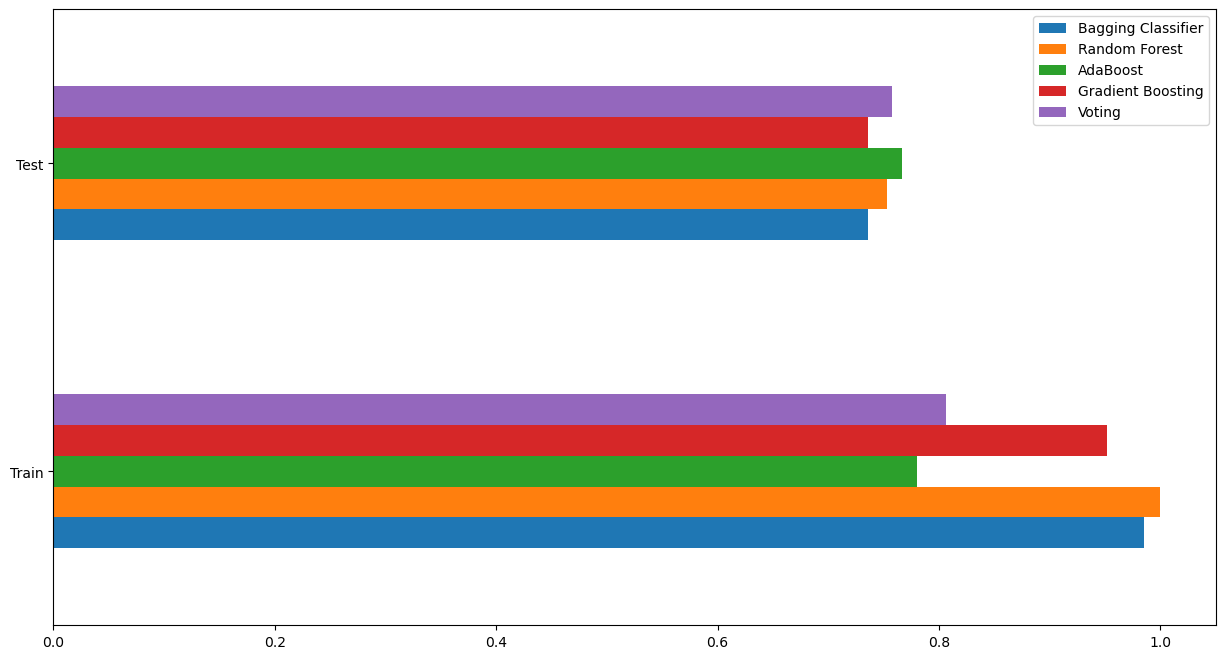

In [36]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))


## Bank Loan Using Random Forest

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv('bankloan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df = df.rename(columns=str.lower)

In [40]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
df.shape

(614, 13)

In [43]:
en = LabelEncoder()
cat =  ['gender','married','education', 'self_employed','property_area','loan_status']
for cols in cat:
    df[cols] = en.fit_transform(df[cols])

In [44]:
df['dependents'].replace('3+',3,inplace=True)

In [45]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [46]:
df.isna().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [47]:
df_clean = df
df_clean.drop('loan_id', axis=1,inplace=True)

In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_clean = pd.DataFrame(imputer.fit_transform(df),columns = df_clean.columns)
df_clean.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [49]:
X = df_clean.drop(columns=['loan_status']).values
y = df_clean['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [52]:
scores = cross_val_score(rfc, X_train, y_train,cv=10)
print("Mean cross-validation score: %.3f" % scores.mean())

Mean cross-validation score: 0.793


In [53]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57        43
         1.0       0.82      0.94      0.87       111

    accuracy                           0.81       154
   macro avg       0.78      0.70      0.72       154
weighted avg       0.80      0.81      0.79       154



In [54]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
pd.crosstab(y_test, y_pred_test)

[[ 20  23]
 [  7 104]]


col_0,0.0,1.0
row_0,,
0.0,20,23
1.0,7,104


<Axes: >

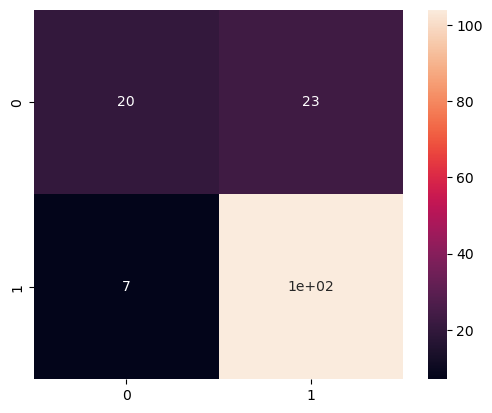

In [55]:
sns.heatmap(cm_test, square=True, annot=True)